In [1]:
import pandas as pd

In [2]:
customers=pd.read_excel("/Users/xinjianlu/Downloads/kpmg1.xlsx",sheet_name="CustomerDemographic")

In [3]:
customers.head(3)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0


In [4]:
customers.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [5]:
customers.shape

(4000, 13)

# customer demographic table only 

We are going to look at the distributions of **Gender**, **Age**,**Job Industry**,**Wealth Segment** and **car ownership**, and investigate how they are related to the bike related purchase over three years

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

### Gender

In [7]:
gender_map={"Female":"F","Male":"M","U":"U","Femal":"F","M":"M","F":"F"}
customers=customers.replace(gender_map)

<AxesSubplot:ylabel='gender'>

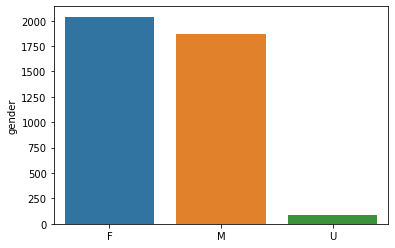

In [8]:
plt.figsize=(5,5)
gender_count=customers[customers["gender"].notnull()]["gender"].value_counts()
sns.barplot(x=gender_count.index,y=gender_count)

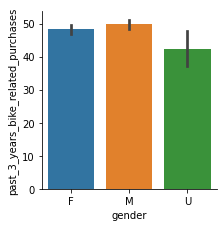

In [9]:
sns.catplot(x="gender",y="past_3_years_bike_related_purchases",data=customers,kind="bar",height=3)

### Age

In [10]:
customers["Age"]=customers["DOB"].apply(lambda x:2017-x.year)

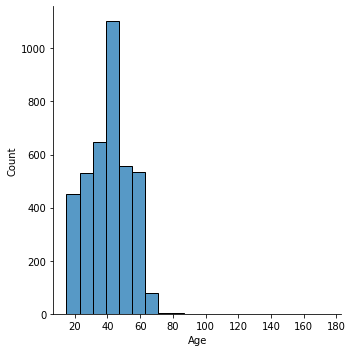

In [11]:
sns.displot(customers,x="Age", binwidth=8)

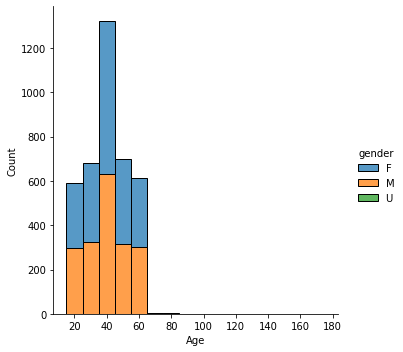

In [12]:
sns.displot(customers,x="Age",binwidth=10,hue="gender",multiple="stack") #multiple="dodge"

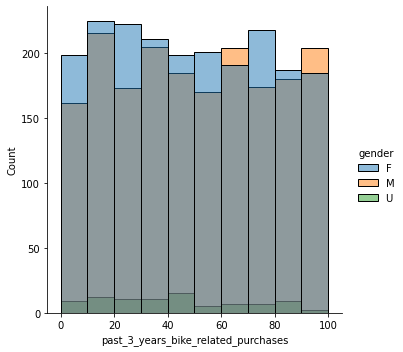

In [13]:
sns.displot(customers,x="past_3_years_bike_related_purchases",hue="gender",binwidth=10)

In [ ]:
#sns.relplot(x='Age',y='past_3_years_bike_related_purchases',data=customers,hue="gender")

### Job Industry

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Argiculture'),
  Text(1, 0, 'Entertainment'),
  Text(2, 0, 'Financial Services'),
  Text(3, 0, 'Health'),
  Text(4, 0, 'IT'),
  Text(5, 0, 'Manufacturing'),
  Text(6, 0, 'Property'),
  Text(7, 0, 'Retail'),
  Text(8, 0, 'Telecommunications')])

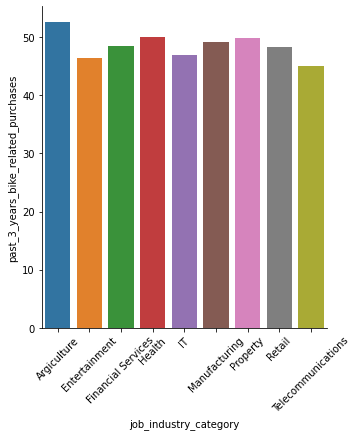

In [14]:
industry_count=customers[customers["job_industry_category"].notnull()][["job_industry_category","past_3_years_bike_related_purchases"]].groupby(by="job_industry_category").mean()
industry_count=industry_count.reset_index()
sns.catplot(x="job_industry_category",y="past_3_years_bike_related_purchases",data=industry_count,kind="bar")
plt.xticks(rotation=45)

(array([-50., -25.,   0.,  25.,  50.,  75., 100., 125., 150.]),
 [Text(-40.0, 0, '−40'),
  Text(-20.0, 0, '−20'),
  Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120')])

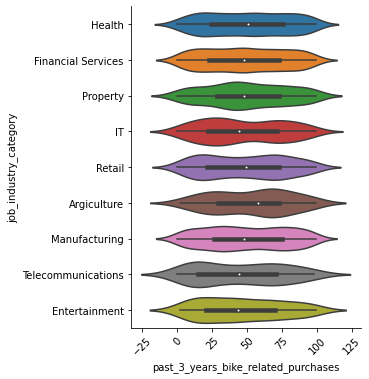

In [15]:
sns.catplot(x="past_3_years_bike_related_purchases",y="job_industry_category",kind="violin",data=customers)
plt.xticks(rotation=45)

### Wealth Segment

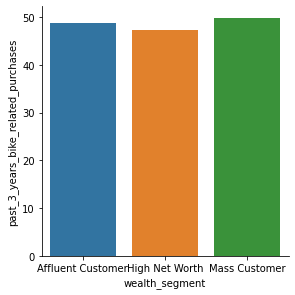

In [16]:
wealth_count=customers[customers["wealth_segment"].notnull()][["wealth_segment","past_3_years_bike_related_purchases"]].groupby(by="wealth_segment").mean()
wealth_count=wealth_count.reset_index()
sns.catplot(x="wealth_segment",y="past_3_years_bike_related_purchases",data=wealth_count,kind="bar",height=4)


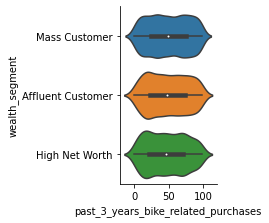

In [17]:
sns.catplot(x="past_3_years_bike_related_purchases",y="wealth_segment",kind="violin",data=customers,height=3)

### Car ownership 

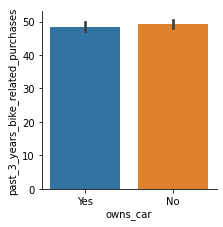

In [18]:
sns.catplot(x="owns_car",y="past_3_years_bike_related_purchases",data=customers,kind="bar",height=3)

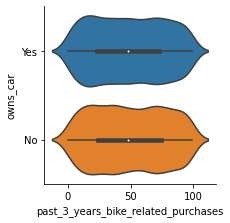

In [19]:
sns.catplot(x="past_3_years_bike_related_purchases",y="owns_car",kind="violin",data=customers,height=3)

From these plots above, we clearly found that **Gender**,**Age**,**Job industry** and **Wealth Segment** didn't have significant effect on the bike related purchase over three years

# transaction table only 

In [21]:
transactions=pd.read_excel("/Users/xinjianlu/Downloads/kpmg1.xlsx",sheet_name="Transactions")

In [22]:
transactions.head(3)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0


In [23]:
transactions=transactions[transactions["order_status"]=="Approved"]

In [24]:
transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               354
order_status                 0
brand                      196
product_line               196
product_class              196
product_size               196
list_price                   0
standard_cost              196
product_first_sold_date    196
dtype: int64

### First We look at how the **brand** or **product_line** effect the price of bicyle

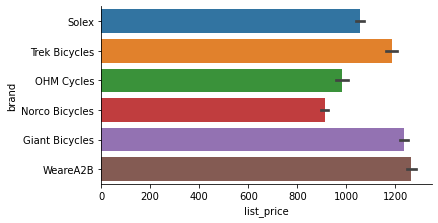

In [25]:
sns.catplot(x="list_price",y="brand",data=transactions,kind="bar",height=3,aspect=2)

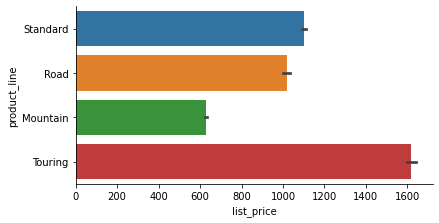

In [26]:
plt.figsize=(10,5)
sns.catplot(x="list_price",y="product_line",data=transactions,kind="bar",height=3,aspect=2)

### We realized that **brand is not** a factor that effect the price but **product line** affected the price **significantly**. 
How about we combine them together 

In [27]:
transactions["brand+line"]=transactions["brand"]+"-"+transactions["product_line"]

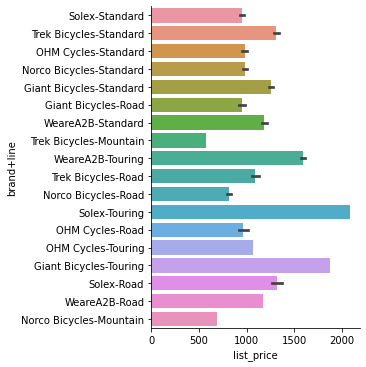

In [28]:
sns.catplot(x="list_price",y="brand+line",data=transactions,kind="bar")

### Next we look at which **brand** or **product line** is popular

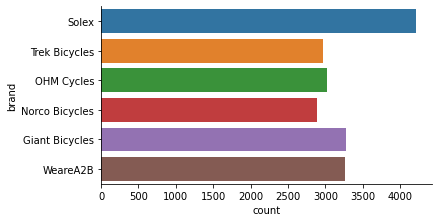

In [29]:
sns.catplot(y="brand",kind="count",data=transactions,height=3,aspect=2)

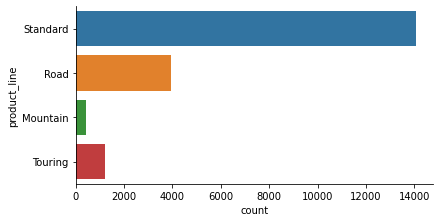

In [30]:
sns.catplot(y="product_line",kind="count",data=transactions,height=3,aspect=2)

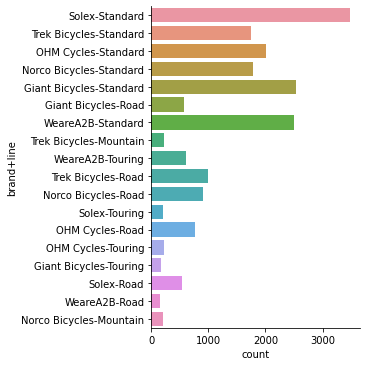

In [31]:
sns.catplot(y="brand+line",kind="count",data=transactions)

Customers seems **don't have strong preference of the brand**, but they do **have preference on product line** we can see that standard bicyle takes more than 50% of the total sales

# Join customers demographic and transactions together

In [32]:
trans=transactions[["customer_id","transaction_id","brand","product_line","list_price"]]
cus=customers[["customer_id","gender","job_industry_category","wealth_segment","owns_car","Age"]]

In [33]:
trans["fav_brand"]=trans.groupby(by="customer_id")["brand"].transform(lambda x:x.value_counts().index[0])

<ipython-input-33-e8af28a3fe79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans["fav_brand"]=trans.groupby(by="customer_id")["brand"].transform(lambda x:x.value_counts().index[0])


In [34]:
trans["fav_line"]=trans.groupby(by="customer_id")["product_line"].transform(lambda x:x.value_counts().index[0])

<ipython-input-34-f0c6b8484ced>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans["fav_line"]=trans.groupby(by="customer_id")["product_line"].transform(lambda x:x.value_counts().index[0])


In [35]:
cnt_series=trans.groupby(by="customer_id")["transaction_id"].count()

In [36]:
trans1=trans[["customer_id","fav_brand","fav_line"]].drop_duplicates().sort_values(by="customer_id").set_index("customer_id")

In [37]:
trans1["purchase_cnt"]=cnt_series

In [38]:
trans1.reset_index(inplace=True)

In [39]:
cus_trans=pd.merge(cus,trans1,how="inner",on="customer_id")

In [40]:
cus_trans.dropna(how="any",inplace=True)

In [41]:
cus_trans.head(3)

,customer_id,gender,job_industry_category,wealth_segment,owns_car,Age,fav_brand,fav_line,purchase_cnt
0,1,F,Health,Mass Customer,Yes,64.0,Giant Bicycles,Standard,11
1,2,M,Financial Services,Mass Customer,Yes,37.0,WeareA2B,Standard,3
2,3,M,Property,Mass Customer,Yes,63.0,Trek Bicycles,Standard,8


In [42]:
from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()
gender_labels = gle.fit_transform(cus_trans['gender'])
gender_mappings = {index: label for index, label in enumerate(gle.classes_)}
cus_trans['gender'] = gender_labels
gender_mappings

{0: 'F', 1: 'M', 2: 'U'}

In [43]:
job_industry_category_label = gle.fit_transform(cus_trans['job_industry_category'])
job_industry_category_mappings = {index: label for index, label in enumerate(gle.classes_)}
cus_trans['job_industry_category'] = job_industry_category_label
job_industry_category_mappings

{0: 'Argiculture',
 1: 'Entertainment',
 2: 'Financial Services',
 3: 'Health',
 4: 'IT',
 5: 'Manufacturing',
 6: 'Property',
 7: 'Retail',
 8: 'Telecommunications'}

In [44]:
wealth_label = gle.fit_transform(cus_trans['wealth_segment'])
wealth_mappings = {index: label for index, label in enumerate(gle.classes_)}
cus_trans['wealth_segment'] = wealth_label
wealth_mappings

{0: 'Affluent Customer', 1: 'High Net Worth', 2: 'Mass Customer'}

In [45]:
car_ownership_label = gle.fit_transform(cus_trans['owns_car'])
car_ownership_mappings = {index: label for index, label in enumerate(gle.classes_)}
cus_trans['owns_car'] = car_ownership_label
car_ownership_mappings

{0: 'No', 1: 'Yes'}

In [46]:
brand_label = gle.fit_transform(cus_trans['fav_brand'])
brand_mappings = {index: label for index, label in enumerate(gle.classes_)}
cus_trans['fav_brand'] = brand_label
brand_mappings

{0: 'Giant Bicycles',
 1: 'Norco Bicycles',
 2: 'OHM Cycles',
 3: 'Solex',
 4: 'Trek Bicycles',
 5: 'WeareA2B'}

In [47]:
line_label = gle.fit_transform(cus_trans['fav_line'])
line_mappings = {index: label for index, label in enumerate(gle.classes_)}
cus_trans['fav_line'] = line_label
line_mappings

{0: 'Mountain', 1: 'Road', 2: 'Standard', 3: 'Touring'}

In [48]:
from sklearn.cluster import KMeans 
k_means=KMeans(init = "k-means++",n_clusters = 3,n_init = 12)

In [49]:
k_means.fit(cus_trans[["gender","job_industry_category","wealth_segment","owns_car","Age","fav_brand","fav_line","purchase_cnt"]])

KMeans(n_clusters=3, n_init=12)

In [50]:
labels = k_means.labels_

In [51]:
cus_trans["label"]=labels

In [52]:
print(cus_trans[cus_trans["label"]==0].shape)
print(cus_trans[cus_trans["label"]==1].shape)
print(cus_trans[cus_trans["label"]==2].shape)

(748, 10)
(885, 10)
(1222, 10)


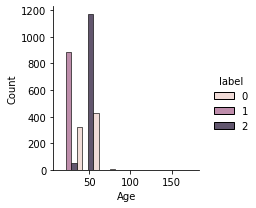

In [114]:
sns.displot(cus_trans,x="Age",binwidth=20,multiple="dodge",height=3,hue="label")

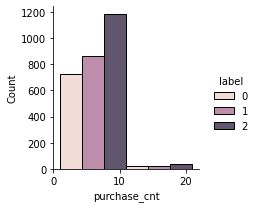

In [54]:
sns.displot(cus_trans,x="purchase_cnt",hue="label",binwidth=10,multiple="dodge",height=3)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 87.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 89.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 92.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


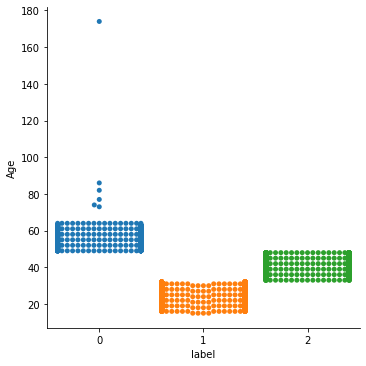

In [55]:
sns.catplot(x="label", y="Age", kind="swarm", data=cus_trans)

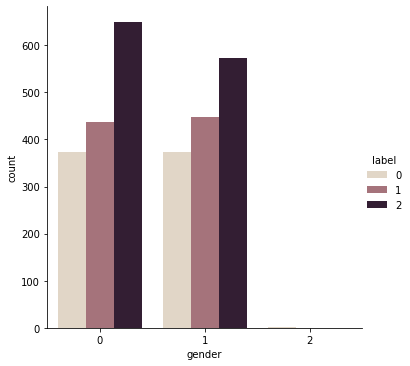

In [56]:
sns.catplot(x="gender", kind="count", palette="ch:.25", data=cus_trans,hue="label")

### From the plots above we can observe that we can classify the customer segment by customers' age

# customer address table

In [59]:
address=pd.read_excel("/Users/xinjianlu/Downloads/kpmg1.xlsx",sheet_name="CustomerAddress")

In [77]:
address.head(3)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9


In [66]:
state_map={"NSW":"NSW","VIC":"VIC","QLD":"QLD","New South Wales":"NSW","Victoria":"VIC"}
address["state"]=address["state"].map(state_map)

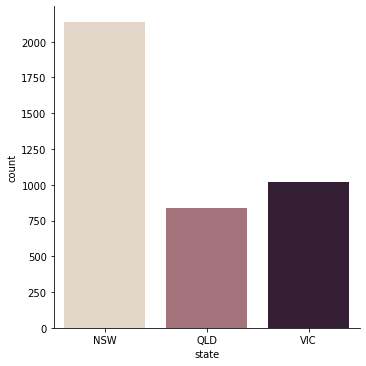

In [71]:
sns.catplot(x="state", kind="count", palette="ch:.25", data=address,height=5)

# Join the three tables

In [73]:
cus_trans_=cus_trans.drop(["label"],axis=1)

In [78]:
address_=address[["customer_id","state","property_valuation"]]

In [79]:
tri_tables=pd.merge(cus_trans_,address_,how="inner",on="customer_id")

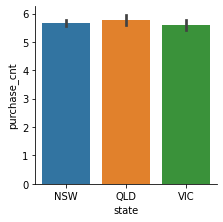

In [84]:
sns.catplot(x="state", y="purchase_cnt",kind="bar",data=tri_tables,height=3)

In [ ]:
sns.catplot(x="state", y="purchase_cnt",kind="bar",data=tri_tables,height=3)

In [89]:
#sns.lmplot(x="purchase_cnt", y="property_valuation", data=tri_tables)

In [91]:
state_label = gle.fit_transform(tri_tables['state'])
state_mappings = {index: label for index, label in enumerate(gle.classes_)}
tri_tables['state'] = state_label
state_mappings

{0: 'NSW', 1: 'QLD', 2: 'VIC'}

In [92]:
tri_tables.head(3)

,customer_id,gender,job_industry_category,wealth_segment,owns_car,Age,fav_brand,fav_line,purchase_cnt,state,property_valuation
0,1,0,3,2,1,64.0,0,2,11,0,10
1,2,1,2,2,1,37.0,5,2,3,0,10
2,4,1,4,2,0,56.0,0,2,2,1,9


In [93]:
from sklearn.cluster import KMeans 
k_means=KMeans(init = "k-means++",n_clusters = 3,n_init = 12)

In [95]:
k_means.fit(tri_tables[["gender","job_industry_category","wealth_segment","owns_car","Age","fav_brand","fav_line","purchase_cnt","state","property_valuation"]])

KMeans(n_clusters=3, n_init=12)

In [96]:
labels = k_means.labels_
tri_tables["label"]=labels

In [97]:
print(tri_tables[tri_tables["label"]==0].shape)
print(tri_tables[tri_tables["label"]==1].shape)
print(tri_tables[tri_tables["label"]==2].shape)

(746, 12)
(884, 12)
(1222, 12)


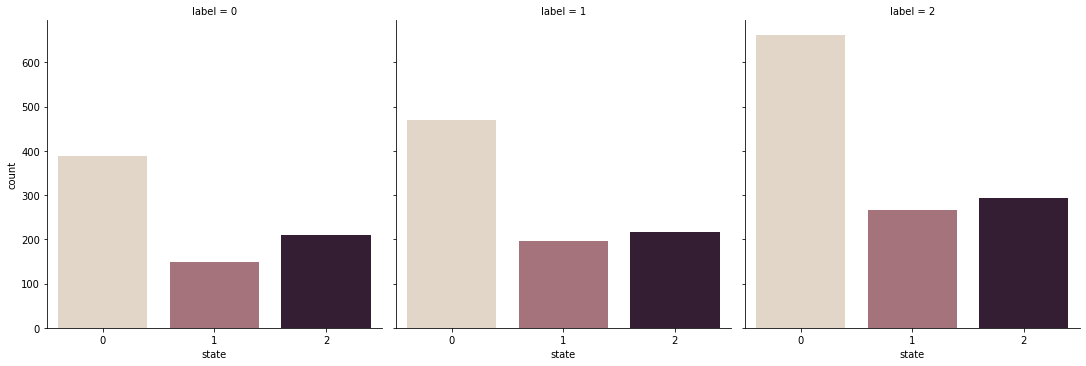

In [140]:
sns.catplot(x="state", kind="count", palette="ch:.25", data=tri_tables,col="label")

In [137]:
#sns.catplot(y="state", kind="count", palette="ch:.25", data=tri_tables,hue="label")

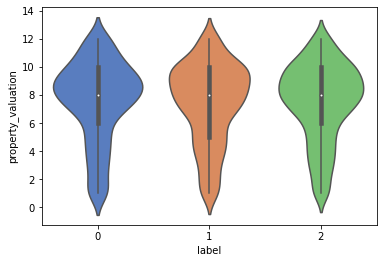

In [134]:
ax = sns.violinplot(x="label", y="property_valuation",
                    data=tri_tables, palette="muted")

In [133]:
#sns.catplot(x="label", y="property_valuation", kind="box", data=tri_tables,height=5)

In [130]:
#sns.stripplot(x="label", y="job_industry_category", data=tri_tables)

In [119]:
#sns.catplot(x="label", y="property_valuation", kind="swarm", data=tri_tables)

In [117]:
#sns.displot(tri_tables, x="property_valuation", stat="density", common_norm=False,col="label",height=5,kde=True)

### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
features=cus_trans[["gender","job_industry_category","wealth_segment","owns_car","Age","fav_brand","fav_line","purchase_cnt"]]
db = DBSCAN(eps=5, min_samples=5).fit(features)

In [ ]:
labels1=db.labels_

In [ ]:
cus_trans["label_1"]=labels1

In [ ]:
len(set(labels1)) 

In [ ]:
#sns.catplot(x="wealth_segment", kind="count", palette="ch:.25", data=cus_trans,hue="label_1")

In [ ]:
sns.catplot(x="label_1", y="Age", kind="swarm", data=cus_trans)

# Conclusion: goes with K-Means and we can classify the customers by their age